In [2]:
import pandas as pd
import numpy as np


In [3]:
df=pd.read_csv(r'C:\Users\GD077686\OneDrive - Cerner Corporation\Desktop\flipRobo\Micro-Credit-Project\Micro Credit Project\Data file.csv')
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

In [4]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [5]:
#We can notice that there is an extra column named--> Unnamed: 0 which appears to be an index column,
#it would be of no use hence dropping it.

df.drop(['Unnamed: 0'], axis=1,inplace=True)

In [6]:
df.shape

(209593, 36)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
label                   209593 non-null int64
msisdn                  209593 non-null object
aon                     209593 non-null float64
daily_decr30            209593 non-null float64
daily_decr90            209593 non-null float64
rental30                209593 non-null float64
rental90                209593 non-null float64
last_rech_date_ma       209593 non-null float64
last_rech_date_da       209593 non-null float64
last_rech_amt_ma        209593 non-null int64
cnt_ma_rech30           209593 non-null int64
fr_ma_rech30            209593 non-null float64
sumamnt_ma_rech30       209593 non-null float64
medianamnt_ma_rech30    209593 non-null float64
medianmarechprebal30    209593 non-null float64
cnt_ma_rech90           209593 non-null int64
fr_ma_rech90            209593 non-null int64
sumamnt_ma_rech90       209593 non-null int64
medianamnt_ma_rech90    209593 non-nul

In [8]:

#we can observe that almost all columns are of either integer or float type,very few are of object type
#storing object type columns into a separate dataframe
objecttypes=df.select_dtypes(include=['object'])
objecttypes

msisdn pcircle       pdate
0       21408I70789     UPW  2016-07-20
1       76462I70374     UPW  2016-08-10
2       17943I70372     UPW  2016-08-19
3       55773I70781     UPW  2016-06-06
4       03813I82730     UPW  2016-06-22
...             ...     ...         ...
209588  22758I85348     UPW  2016-06-17
209589  95583I84455     UPW  2016-06-12
209590  28556I85350     UPW  2016-07-29
209591  59712I82733     UPW  2016-07-25
209592  65061I85339     UPW  2016-07-07

[209593 rows x 3 columns]

OBSERVATION:

1) The msisdn has numeric entries,so converting this column into integer type.

2)Checking the Pcircle entries ,seems all the rows has same telecom provider name.
 If all the entries are same in pcircle column, will be deleting the column.

3)Will be converting the pdate column into like year ,month and date.

In [10]:
for col in objecttypes.columns:
    print(" No.of unique values in ",col," ::",objecttypes[col].nunique())
    print("\n",col,"\n",objecttypes[col].value_counts)
    print("********************************************")

 No.of unique values in  msisdn  :: 186243

 msisdn 
 <bound method IndexOpsMixin.value_counts of 0         21408I70789
1         76462I70374
2         17943I70372
3         55773I70781
4         03813I82730
             ...     
209588    22758I85348
209589    95583I84455
209590    28556I85350
209591    59712I82733
209592    65061I85339
Name: msisdn, Length: 209593, dtype: object>
********************************************
 No.of unique values in  pcircle  :: 1

 pcircle 
 <bound method IndexOpsMixin.value_counts of 0         UPW
1         UPW
2         UPW
3         UPW
4         UPW
         ... 
209588    UPW
209589    UPW
209590    UPW
209591    UPW
209592    UPW
Name: pcircle, Length: 209593, dtype: object>
********************************************
 No.of unique values in  pdate  :: 82

 pdate 
 <bound method IndexOpsMixin.value_counts of 0         2016-07-20
1         2016-08-10
2         2016-08-19
3         2016-06-06
4         2016-06-22
             ...    
209588    20

In [11]:
df.drop(['pcircle'],inplace=True,axis=1)

In [14]:
len(df['msisdn'][0])

11

In [15]:
df['msisdn']=df['msisdn'].str.replace('I','')

In [16]:
df['msisdn'].head() #here we have removed Str I from the values.

0    2140870789
1    7646270374
2    1794370372
3    5577370781
4    0381382730
Name: msisdn, dtype: object

In [18]:
df['msisdn']

0         2140870789
1         7646270374
2         1794370372
3         5577370781
4         0381382730
             ...    
209588    2275885348
209589    9558384455
209590    2855685350
209591    5971282733
209592    6506185339
Name: msisdn, Length: 209593, dtype: object

In [19]:
df['msisdn']=df['msisdn'].astype('int64')

- Converted the column from object type to int64

In [23]:
df['day']=pd.to_datetime(df['pdate'],format="%Y/%m/%d").dt.day
df['Month']=pd.to_datetime(df['pdate'],format="%Y/%m/%d").dt.month
df['Year']=pd.to_datetime(df['pdate'],format="%Y/%m/%d").dt.year



- splitted the pdate column,into 3 columns using pandas datetime 

In [24]:
df.head()

label      msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  2140870789  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  7646270374  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  1794370372  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  5577370781  241.0     21.228000     21.228000    159.42    159.42   
4      1   381382730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  cnt_loans90  \
0                2.0                0.0              1539  ...          2.0   
1               20.0                0.0              5787  ...          1.0   
2                3.0                0.0              1539  ...          1.0   
3               41.0                0.0               947  ...          2.0   
4                4.0                0.0              2309  ...          7.0   

   amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  payback90  \
0            12                6                 0.0  29.000000  29.000000   
1            12               12                 0.0   0.000000   0.000000   
2             6                6                 0.0   0.000000   0.000000   
3            12                6                 0.0   0.000000   0.000000   
4            42                6                 0.0   2.333333   2.333333   

        pdate  day  Month  Year  
0  2016-07-20   20      7  2016  
1  2016-08-10   10      8  2016  
2  2016-08-19   19      8  2016  
3  2016-06-06    6      6  2016  
4  2016-06-22   22      6  2016  

[5 rows x 38 columns]

In [25]:
#since we have splitted the pdate column,into 3 columns,dropping pdate column
df.drop(['pdate'],axis=1,inplace=True)

In [26]:

#checking the unique values in year column.
df['Year'].nunique()

1

In [27]:
df.drop(['Year'],axis=1,inplace=True)

- since all the data collected is about 2016 year,dropping the year column as weel

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
label                   209593 non-null int64
msisdn                  209593 non-null int64
aon                     209593 non-null float64
daily_decr30            209593 non-null float64
daily_decr90            209593 non-null float64
rental30                209593 non-null float64
rental90                209593 non-null float64
last_rech_date_ma       209593 non-null float64
last_rech_date_da       209593 non-null float64
last_rech_amt_ma        209593 non-null int64
cnt_ma_rech30           209593 non-null int64
fr_ma_rech30            209593 non-null float64
sumamnt_ma_rech30       209593 non-null float64
medianamnt_ma_rech30    209593 non-null float64
medianmarechprebal30    209593 non-null float64
cnt_ma_rech90           209593 non-null int64
fr_ma_rech90            209593 non-null int64
sumamnt_ma_rech90       209593 non-null int64
medianamnt_ma_rech90    209593 non-null

In [29]:
df.describe()

label        msisdn            aon   daily_decr30  \
count  209593.000000  2.095930e+05  209593.000000  209593.000000   
mean        0.875177  4.974956e+09    8112.343445    5381.402289   
std         0.330519  2.890571e+09   75696.082531    9220.623400   
min         0.000000  4.827380e+05     -48.000000     -93.012667   
25%         1.000000  2.465991e+09     246.000000      42.440000   
50%         1.000000  4.905684e+09     527.000000    1469.175667   
75%         1.000000  7.503370e+09     982.000000    7244.000000   
max         1.000000  9.999895e+09  999860.755168  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  209593.000000  209593.000000  209593.000000      209593.000000   
mean     6082.515068    2692.581910    3483.406534        3755.847800   
std     10918.812767    4308.586781    5770.461279       53905.892230   
min       -93.012667  -23737.140000  -24720.580000         -29.000000   
25%        42.692000     280.420000     300.260000           1.000000   
50%      1500.000000    1083.570000    1334.000000           3.000000   
75%      7802.790000    3356.940000    4201.790000           7.000000   
max    320630.000000  198926.110000  200148.110000      998650.377733   

       last_rech_date_da  last_rech_amt_ma  ...  maxamnt_loans30  \
count      209593.000000     209593.000000  ...    209593.000000   
mean         3712.202921       2064.452797  ...       274.658747   
std         53374.833430       2370.786034  ...      4245.264648   
min           -29.000000          0.000000  ...         0.000000   
25%             0.000000        770.000000  ...         6.000000   
50%             0.000000       1539.000000  ...         6.000000   
75%             0.000000       2309.000000  ...         6.000000   
max        999171.809410      55000.000000  ...     99864.560864   

       medianamnt_loans30    cnt_loans90   amnt_loans90  maxamnt_loans90  \
count       209593.000000  209593.000000  209593.000000    209593.000000   
mean             0.054029      18.520919      23.645398         6.703134   
std              0.218039     224.797423      26.469861         2.103864   
min              0.000000       0.000000       0.000000         0.000000   
25%              0.000000       1.000000       6.000000         6.000000   
50%              0.000000       2.000000      12.000000         6.000000   
75%              0.000000       5.000000      30.000000         6.000000   
max              3.000000    4997.517944     438.000000        12.000000   

       medianamnt_loans90      payback30      payback90           day  \
count       209593.000000  209593.000000  209593.000000  209593.00000   
mean             0.046077       3.398826       4.321485      14.39894   
std              0.200692       8.813729      10.308108       8.43890   
min              0.000000       0.000000       0.000000       1.00000   
25%              0.000000       0.000000       0.000000       7.00000   
50%              0.000000       0.000000       1.666667      14.00000   
75%              0.000000       3.750000       4.500000      21.00000   
max              3.000000     171.500000     171.500000      31.00000   

               Month  
count  209593.000000  
mean        6.797321  
std         0.741435  
min         6.000000  
25%         6.000000  
50%         7.000000  
75%         7.000000  
max         8.000000  

[8 rows x 36 columns]

# COLUMNS WITH NEGATIVE MINIMUM VALUES:
- aon=>indicates Age On Cellular Network in days.

- daily_decr30=>Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

- daily_decr90=>Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

- rental30=>Average main account balance over last 30 days

- rental90=>Average main account balance over last 90 days

- last_rech_date_ma=>Number of days till last recharge of main account

- last_rech_date_da=>Number of days till last recharge of data account

In [31]:
df_aon=df[df['aon']<1]
df_aon

label      msisdn   aon  daily_decr30  daily_decr90  rental30  \
30          1  7013090843 -42.0      8.864333      8.864333    780.71   
197         1  4685890841 -36.0     32.075333     32.075333   1557.53   
322         1   302770379 -37.0      9.160000      9.160000    203.04   
504         1  7567084458 -36.0     11.470333     11.470333     40.04   
603         1  5849589235 -35.0     12.474000     12.474000   1823.08   
...       ...         ...   ...           ...           ...       ...   
208716      1  1016290589 -34.0     19.260000     19.260000    714.15   
209121      1  6551184450 -18.0    700.580000    700.600000   1057.72   
209240      1  3489670375 -28.0     10.640000     10.640000    133.35   
209421      1  5171784459 -44.0      7.166667      7.166667    368.55   
209514      0  5050870786  -2.0   1030.000000   1030.000000    634.91   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
30        780.71      780195.497093                0.0               773  ...   
197      1557.53           1.000000                0.0              1539  ...   
322       203.04           1.000000                0.0               770  ...   
504        40.04           1.000000                0.0               770  ...   
603      1823.08           1.000000                0.0              1539  ...   
...          ...                ...                ...               ...  ...   
208716    714.15           1.000000                0.0               773  ...   
209121   1090.76           1.000000                0.0               770  ...   
209240    133.35           1.000000                0.0               770  ...   
209421    368.55           1.000000                0.0               773  ...   
209514    634.91           1.000000                0.0              1539  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
30                  6.0                 1.0     1.000000             6   
197                 6.0                 0.0     1.000000             6   
322                 6.0                 0.0     1.000000             6   
504                 6.0                 0.0  3565.786503             6   
603                 6.0                 0.0     1.000000             6   
...                 ...                 ...          ...           ...   
208716              6.0                 0.0     1.000000             6   
209121              6.0                 0.0     1.000000             6   
209240              6.0                 0.0     1.000000             6   
209421              6.0                 0.0     1.000000             6   
209514              6.0                 1.0     1.000000             6   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  day  Month  
30                    6                 1.0        0.0        0.0    7      6  
197                   6                 0.0        0.0        0.0   13      6  
322                   6                 0.0        0.0        0.0   12      6  
504                   6                 0.0        0.0        0.0   13      6  
603                   6                 0.0        0.0        0.0   14      6  
...                 ...                 ...        ...        ...  ...    ...  
208716                6                 0.0        0.0        0.0   15      6  
209121                6                 0.0        0.0        0.0    1      7  
209240                6                 0.0        0.0        0.0   21      6  
209421                6                 0.0        0.0        0.0    5      6  
209514                6                 1.0        0.0        0.0   17      7  

[1539 rows x 36 columns]

In [32]:
df_aon['label'].value_counts()

1    1047
0     492
Name: label, dtype: int64

#Observation:

- notice that there are both success and failure in payment of loans.Hence assumingthe minus sign might be typo.

- converting the aon column to positive.

In [33]:
df['aon']=abs(df['aon'])

In [34]:

#checking for minimum value.
df['aon'].min()

1.0

In [36]:
#no.of days till last recharge of main and data accounts cant be negative.
#converting them into positive values.
df['last_rech_date_ma']=abs(df['last_rech_date_ma'])
df['last_rech_date_da']=abs(df['last_rech_date_da'])

In [37]:
df['last_rech_date_ma'].min()


0.0

In [38]:
df['last_rech_date_da'].min()

0.0

In [43]:
#creating a dataframe which has negative values in rental30 column
df_ren30=df[df['rental30']<0]
df_ren30

label      msisdn     aon  daily_decr30  daily_decr90  rental30  \
24          0  5964582735   966.0    291.563333    291.563333  -2020.09   
41          1  8558070784   545.0    113.750000    113.750000   -110.75   
77          1  9838870377   383.0   1219.782000   1238.740000   -889.14   
116         1  7336570375   157.0     63.720000     63.720000   -177.48   
117         1  4189484454  1140.0     23.833333     23.833333    -40.20   
...       ...         ...     ...           ...           ...       ...   
209304      1  6444290584   410.0    176.045333    176.045333   -281.12   
209332      1  2736185329  1652.0   5062.936000   5194.680000   -101.16   
209441      1  6562282739   918.0    444.209333    444.209333   -691.90   
209466      1  5952588698   190.0   2601.750000   2622.100000   -334.62   
209574      1  3469770379   547.0      9.509000      9.509000    -16.86   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
24      -2020.09           0.000000                0.0                 0  ...   
41       -110.75           6.000000                0.0              4048  ...   
77       -919.80          22.000000                0.0              3178  ...   
116      -177.48           0.000000                0.0                 0  ...   
117       -40.20           6.000000                0.0              1547  ...   
...          ...                ...                ...               ...  ...   
209304   -281.12          18.000000                0.0             10000  ...   
209332   -505.80          32.000000                0.0              8000  ...   
209441   -691.90           1.000000                0.0              8000  ...   
209466   -441.57      767980.563105                0.0              1539  ...   
209574    -16.86           0.000000                0.0                 0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
24                  6.0                 0.0          1.0             6   
41                  6.0                 0.0          2.0            12   
77                  6.0                 0.0          1.0             6   
116                 6.0                 0.0          2.0            12   
117                 6.0                 0.0          2.0            12   
...                 ...                 ...          ...           ...   
209304              6.0                 0.0          3.0            18   
209332              6.0                 0.0          4.0            24   
209441              6.0                 0.0          1.0             6   
209466             12.0                 0.0          3.0            24   
209574              6.0                 0.0          1.0             6   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  day  Month  
24                    6                 0.0        0.0        0.0   23      6  
41                    6                 0.0       12.0       12.0   25      6  
77                    6                 0.0        0.0        0.0    1      7  
116                   6                 0.0        0.0        0.0   18      6  
117                   6                 0.0        5.0        5.0    5      6  
...                 ...                 ...        ...        ...  ...    ...  
209304                6                 0.0        2.0        2.0   28      6  
209332                6                 0.0        0.0        2.0   24      7  
209441                6                 0.0        0.0        0.0   22      6  
209466               12                 0.0        6.0        6.0    5      7  
209574                6                 0.0        0.0        0.0    3      6  

[5628 rows x 36 columns]

In [44]:

#dataframe who failed to pay loan with respect to average rental balance of 30 days
df_renFail=df_ren30[df_ren30['label']==0]
df_renFail[['label','rental90','amnt_loans90']]

label  rental90  amnt_loans90
24          0  -2020.09             6
246         0   -229.77             6
1469        0   -163.90            24
1777        0   -121.21             6
2681        0   -443.04            18
...       ...       ...           ...
207113      0   -278.64             6
207949      0  -3719.25             6
208543      0   -187.00             6
209175      0  -1126.16             6
209231      0   -158.70            12

[398 rows x 3 columns]

In [45]:
#dataframe who successfully pay loan with respect to average rental balance of 30 days
df_renPaid=df_ren30[df_ren30['label']==1]
df_renPaid[['label','rental90','amnt_loans90']]

label  rental90  amnt_loans90
41          1   -110.75            12
77          1   -919.80             6
116         1   -177.48            12
117         1    -40.20            12
125         1    -44.88            24
...       ...       ...           ...
209304      1   -281.12            18
209332      1   -505.80            24
209441      1   -691.90             6
209466      1   -441.57            24
209574      1    -16.86             6

[5230 rows x 3 columns]

OBSERVATION:

- We can note that eventhough the average rental balance is in negatives[which means the customer owe rent to company],
 they did repay their loans,which is most unlikely.

- There might be other possibility that user will not be granted loan if they have negative balance.
This might be due to erroneous entry.So converting them to positive. 

In [46]:
df['rental30']=abs(df['rental30'])

In [47]:
#creating a dataframe which has negative values in rental90 column
df_ren90=df[df['rental90']<0]
df_ren90[['label','rental90','amnt_loans90']]

label  rental90  amnt_loans90
24          0  -2020.09             6
41          1   -110.75            12
77          1   -919.80             6
116         1   -177.48            12
117         1    -40.20            12
...       ...       ...           ...
209304      1   -281.12            18
209332      1   -505.80            24
209441      1   -691.90             6
209466      1   -441.57            24
209574      1    -16.86             6

[5929 rows x 3 columns]

In [48]:
#dataframe who failed to pay loan with respect to average rental balance of 90 days
df_ren90Fail=df_ren90[df_ren90['label']==0]
df_ren90Fail[['label','rental90','amnt_loans90']]

label  rental90  amnt_loans90
24          0  -2020.09             6
246         0   -229.77             6
1309        0    -83.02            12
1469        0   -163.90            24
1777        0   -121.21             6
...       ...       ...           ...
207113      0   -278.64             6
207949      0  -3719.25             6
208543      0   -187.00             6
209175      0  -1126.16             6
209231      0   -158.70            12

[414 rows x 3 columns]

In [49]:

#dataframe who failed to pay loan with respect to average rental balance of 90 days
df_ren90Pass=df_ren90[df_ren90['label']==1]
df_ren90Pass[['label','rental90','amnt_loans90']]

label  rental90  amnt_loans90
41          1   -110.75            12
77          1   -919.80             6
116         1   -177.48            12
117         1    -40.20            12
125         1    -44.88            24
...       ...       ...           ...
209304      1   -281.12            18
209332      1   -505.80            24
209441      1   -691.90             6
209466      1   -441.57            24
209574      1    -16.86             6

[5515 rows x 3 columns]

In [50]:
#converting rental 90 column to positive.As there are negative values for people who had repaid their loans.
df['rental90']=abs(df['rental90'])

In [51]:

df['maxamnt_loans30'].value_counts()

6.000000        179193
12.000000        26109
0.000000          3244
59275.166722         1
68599.755670         1
                 ...  
26462.333521         1
53666.885900         1
67319.013426         1
36610.121211         1
28708.879352         1
Name: maxamnt_loans30, Length: 1050, dtype: int64

In [52]:

maxamnt_loans30-> this column has to be either 6 or 12

we can notice that there are huge no.of entries other than 6,12. ignoring 0 because there might be users who hasnt taken loans.

Converting the other numbers to zero cz there is no probability of loan repay amount other than 6 ad 12

there are 1047 rows that has values other than 6,12 and0.

SyntaxError: invalid syntax (<ipython-input-52-366d78dcbab9>, line 1)

In [53]:
len(df['maxamnt_loans30'])

209593

In [54]:

#checking the values which have entries other than 6,12,0
df.loc[(df['maxamnt_loans30'] != 6.0) & (df['maxamnt_loans30'] != 12.0) & (df['maxamnt_loans30']!=0.0), 'maxamnt_loans30']

118       61907.697372
125       22099.413732
146       98745.934048
369       58925.364061
374       78232.464324
              ...     
209189    50824.996349
209262    17324.994582
209331    92864.501728
209392    54259.265687
209424    96927.243252
Name: maxamnt_loans30, Length: 1047, dtype: float64

In [55]:
#converting them to zero
df.loc[(df['maxamnt_loans30'] != 6.0) & (df['maxamnt_loans30'] != 12.0) & (df['maxamnt_loans30']!=0.0), 'maxamnt_loans30']=0.0

In [56]:

#checking the users who havent taken any loan.
dff=pd.DataFrame(np.where(df['amnt_loans90']==0))
dff

0     1     2     3     4     5     6     7     8     9     ...    2033  \
0   127   149   187   212   262   431   441   475   488   570  ...  208137   

     2034    2035    2036    2037    2038    2039    2040    2041    2042  
0  208148  208231  208818  209213  209337  209343  209401  209406  209580  

[1 rows x 2043 columns]

OBSERVATION:

- there are almmost 2043 rows in the main data frame where users have not taken any kind of loan.

- Deleting those rows because they wont be of any use in prediction of loan repayment.

In [57]:
#deleting the info of users who havent taken any loan.
df.drop(df[df['amnt_loans90']==0].index, inplace = True)

In [58]:
np.where(df['amnt_loans90']==0)

(array([], dtype=int64),)

In [59]:

df.shape

(207550, 36)

In [60]:
df.describe()

label        msisdn            aon   daily_decr30  \
count  207550.000000  2.075500e+05  207550.000000  207550.000000   
mean        0.873948  4.976519e+09    8095.625616    5352.424286   
std         0.331908  2.891052e+09   75605.518933    9208.694592   
min         0.000000  4.827380e+05       1.000000     -93.012667   
25%         1.000000  2.467696e+09     246.000000      41.760000   
50%         1.000000  4.908380e+09     527.000000    1414.400000   
75%         1.000000  7.506760e+09     982.000000    7200.000000   
max         1.000000  9.999895e+09  999860.755168  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  207550.000000  207550.000000  207550.000000      207550.000000   
mean     6044.967417    2697.321812    3477.845090        3744.568567   
std     10902.815812    4258.460653    5698.968928       53813.257533   
min       -93.012667       0.000000       0.000000           0.000000   
25%        41.979500     299.690000     326.340000           1.000000   
50%      1443.355000    1088.165000    1332.425000           3.000000   
75%      7723.997500    3334.750000    4167.762500           7.000000   
max    320630.000000  198926.110000  200148.110000      998650.377733   

       last_rech_date_da  last_rech_amt_ma  ...  maxamnt_loans30  \
count      207550.000000     207550.000000  ...    207550.000000   
mean         3719.710805       2057.044751  ...         6.689790   
std         53428.256336       2363.829442  ...         2.107794   
min             0.000000          0.000000  ...         0.000000   
25%             0.000000        770.000000  ...         6.000000   
50%             0.000000       1539.000000  ...         6.000000   
75%             0.000000       2309.000000  ...         6.000000   
max        999171.809410      55000.000000  ...        12.000000   

       medianamnt_loans30    cnt_loans90   amnt_loans90  maxamnt_loans90  \
count       207550.000000  207550.000000  207550.000000    207550.000000   
mean             0.054560      18.610723      23.878150         6.769116   
std              0.219043     225.235874      26.495145         2.005785   
min              0.000000       1.000000       6.000000         6.000000   
25%              0.000000       1.000000       6.000000         6.000000   
50%              0.000000       2.000000      12.000000         6.000000   
75%              0.000000       5.000000      30.000000         6.000000   
max              3.000000    4997.517944     438.000000        12.000000   

       medianamnt_loans90      payback30      payback90            day  \
count       207550.000000  207550.000000  207550.000000  207550.000000   
mean             0.046531       3.421201       4.350039      14.429159   
std              0.201625       8.796510      10.294639       8.421331   
min              0.000000       0.000000       0.000000       1.000000   
25%              0.000000       0.000000       0.000000       7.000000   
50%              0.000000       0.000000       1.714286      14.000000   
75%              0.000000       3.800000       4.500000      21.000000   
max              3.000000     171.500000     171.500000      31.000000   

               Month  
count  207550.000000  
mean        6.787560  
std         0.737225  
min         6.000000  
25%         6.000000  
50%         7.000000  
75%         7.000000  
max         8.000000  

[8 rows x 36 columns]

# EXPLORATORY DATA ANALYSIS

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [63]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'day', 'Month'],
      dtype='object')

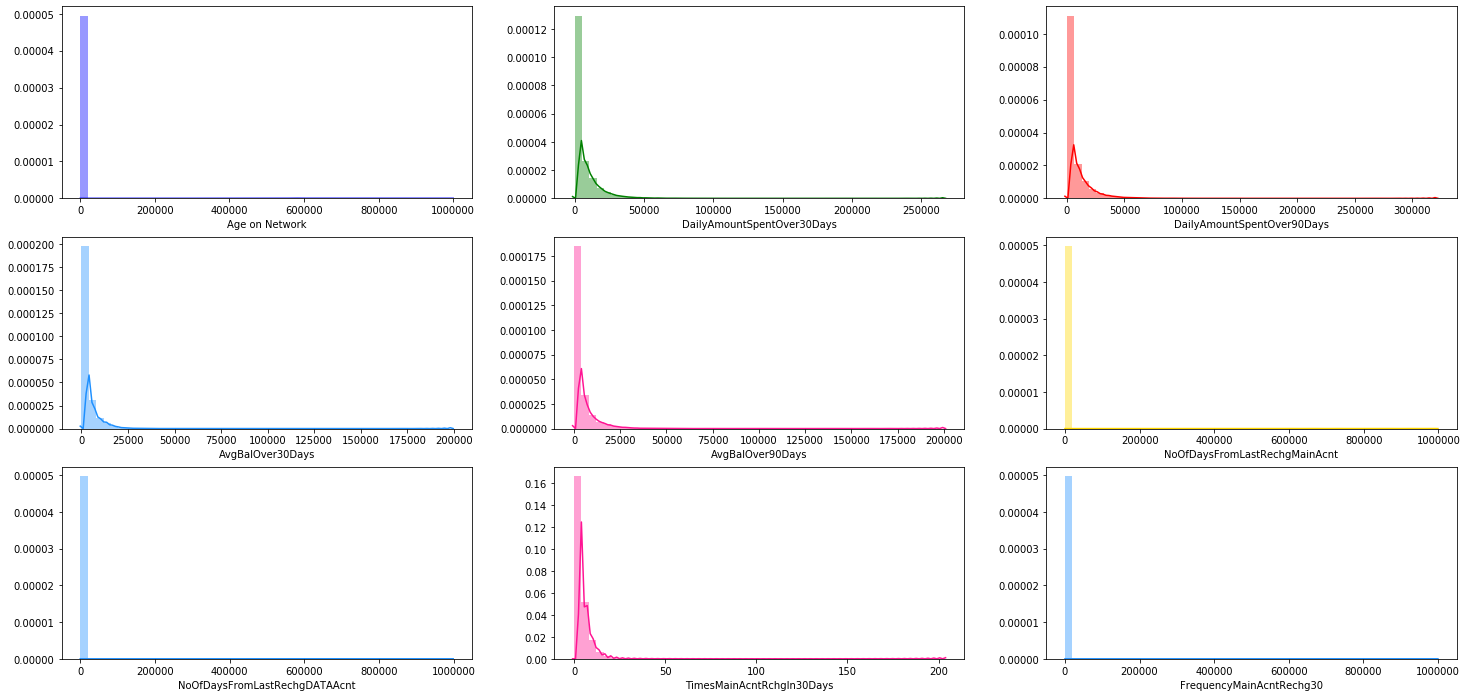

In [64]:
#checking distribution ofcolumns
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3, figsize = (25, 12))

sns.distplot(df['aon'] , color="b",ax=ax1,axlabel='Age on Network')
sns.distplot(df['daily_decr30'] , color="g",ax=ax2,axlabel='DailyAmountSpentOver30Days')
sns.distplot(df['daily_decr90'] , color="r",ax=ax3,axlabel='DailyAmountSpentOver90Days')
sns.distplot(df['rental30'] , color="dodgerblue",ax=ax4,axlabel='AvgBalOver30Days')
sns.distplot(df['rental90'] , color="deeppink",ax=ax5,axlabel='AvgBalOver90Days')
sns.distplot(df['last_rech_date_ma'] , color="gold",ax=ax6,axlabel='NoOfDaysFromLastRechgMainAcnt')
sns.distplot(df['last_rech_date_da'] , color="dodgerblue",ax=ax7,axlabel='NoOfDaysFromLastRechgDATAAcnt')
sns.distplot(df['cnt_ma_rech30'] , color="deeppink",ax=ax8,axlabel='TimesMainAcntRchgIn30Days')
sns.distplot(df['fr_ma_rech30'] , color="dodgerblue",ax=ax9,axlabel='FrequencyMainAcntRechg30')

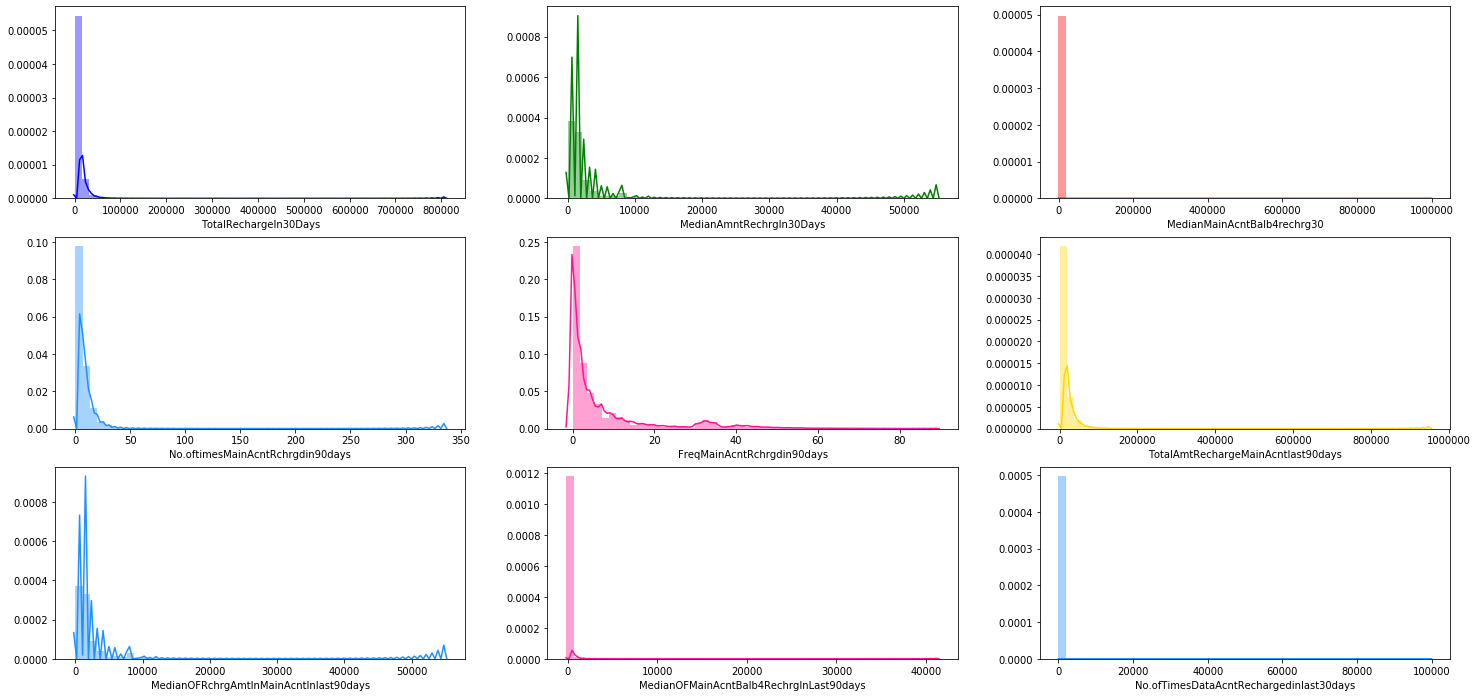

In [65]:
#checking distribution ofcolumns
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3, figsize = (25, 12))

sns.distplot(df['sumamnt_ma_rech30'] , color="b",ax=ax1,axlabel='TotalRechargeIn30Days')
sns.distplot(df['medianamnt_ma_rech30'] , color="g",ax=ax2,axlabel='MedianAmntRechrgIn30Days')
sns.distplot(df['medianmarechprebal30'] , color="r",ax=ax3,axlabel='MedianMainAcntBalb4rechrg30')
sns.distplot(df['cnt_ma_rech90'] , color="dodgerblue",ax=ax4,axlabel='No.oftimesMainAcntRchrgdin90days')
sns.distplot(df['fr_ma_rech90'] , color="deeppink",ax=ax5,axlabel='FreqMainAcntRchrgdin90days')
sns.distplot(df['sumamnt_ma_rech90'] , color="gold",ax=ax6,axlabel='TotalAmtRechargeMainAcntlast90days')
sns.distplot(df['medianamnt_ma_rech90'] , color="dodgerblue",ax=ax7,axlabel='MedianOFRchrgAmtInMainAcntInlast90days')
sns.distplot(df['medianmarechprebal90'] , color="deeppink",ax=ax8,axlabel='MedianOFMainAcntBalb4RechrgInLast90days')
sns.distplot(df['cnt_da_rech30'] , color="dodgerblue",ax=ax9,axlabel='No.ofTimesDataAcntRechargedinlast30days')

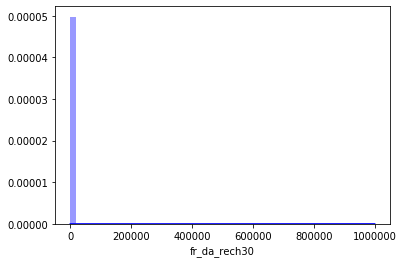

In [66]:
sns.distplot(df['fr_da_rech30'] , color="b",label='FrqncyOfDataAcntRchrgdIn30Days')

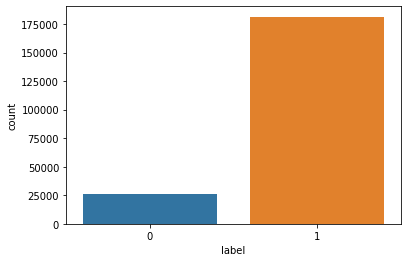

In [67]:
sns.countplot(df['label'])

OBSERVATION:

- We can note that there is less data about defaulters and more about those who did repay their loan.

- Hence can say that the data is imbalanced.

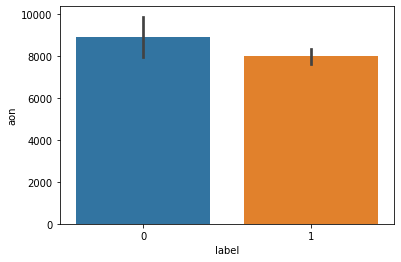

In [68]:

sns.barplot(x='label',y='aon',data=df)

OBSERVATION:

- With increase in Age on Network,defaulting rate is higher.

Text(0.5, 1.0, 'Daily Amount Reduced from Balance Over 30 days')

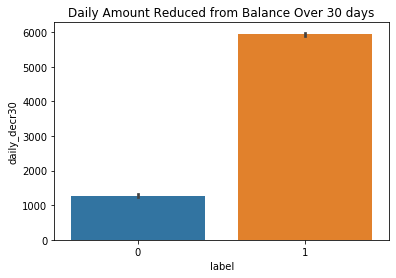

In [69]:
sns.barplot(x=df['label'],y=df['daily_decr30'])
plt.title('Daily Amount Reduced from Balance Over 30 days')

Text(0.5, 1.0, 'Average main account balance over last 30 days')

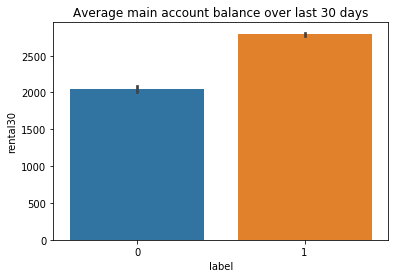

In [70]:
sns.barplot(x=df['label'],y=df['rental30'])
plt.title('Average main account balance over last 30 days')

OBSERVATION:

- There is huge imbalance in the data collected, 
  when compared to the imbalances,we can note that there is less difference between loan default and repayment.
- Hence can say that with the increase in Average Main balance,there is a probability of defaulting.

- Defaulters have  max average balance of 2000,repayers has an avg main balance over 2500

Text(0.5, 1.0, 'No.of times main account got recharged in last 30 days')

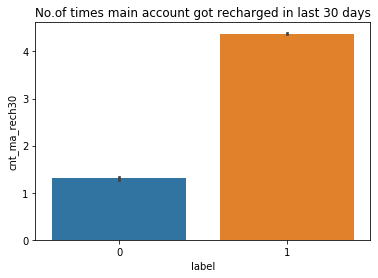

In [71]:
sns.barplot(x=df['label'],y=df['cnt_ma_rech30'])
plt.title('No.of times main account got recharged in last 30 days')

OBSERVATION:

Defaulters recharged Main account max number between 1 and 2 times.

whereas repayers recharged for 4 plus times.

Text(0.5, 1.0, 'Frequency of main account recharged in last 30 days')

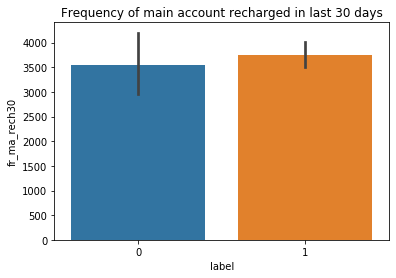

In [74]:

sns.barplot(x=df['label'],y=df['fr_ma_rech30'])
plt.title('Frequency of main account recharged in last 30 days')

OBSERVATION:

- With increase in frequency of Recharge in last 30 days,equal probabilities of defaulting and repayment.
- Even though there is less data about defaulting,there is high chance of defaulting with incresed recharge fdrequency.

Text(0.5, 1.0, 'Total amount of recharge in main account over last 30 days')

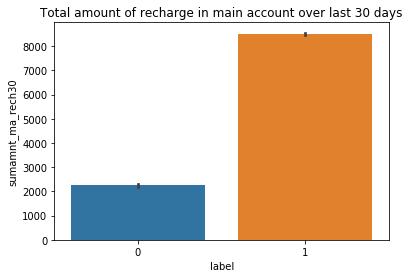

In [75]:

sns.barplot(x=df['label'],y=df['sumamnt_ma_rech30'])
plt.title('Total amount of recharge in main account over last 30 days')

In [76]:
sns.barplot(x=df['label'],y=df['medianamnt_ma_rech30'])
plt.title('Median of recharge  done in main account over last 30 days'

SyntaxError: unexpected EOF while parsing (<ipython-input-76-a72494a9c02c>, line 2)

OBSERVATION:

- On an average the defaulters has recharged for a max of 1000 indonesian rupaiah.

Text(0.5, 1.0, 'Median of Main balance before recharge in last 30 days')

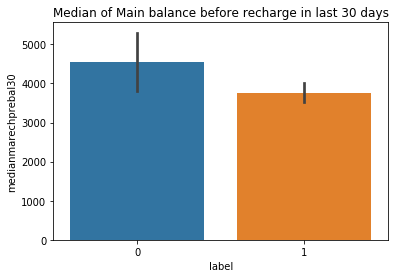

In [77]:
sns.barplot(x=df['label'],y=df['medianmarechprebal30'])
plt.title('Median of Main balance before recharge in last 30 days')

OBSERVATION:

- Defaulters has a medianMain account recharge amount ranging between 4000 and 5000.

- With increase in Median of Main balance recharge,probability of defaulting is very high.

Text(0.5, 1.0, 'No.of times data account got recharged in last 30 days')

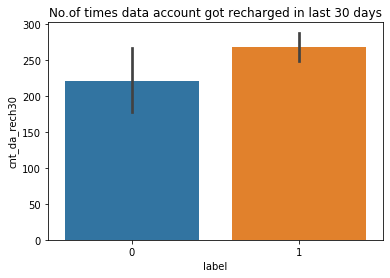

In [78]:
sns.barplot(x=df['label'],y=df['cnt_da_rech30'])
plt.title('No.of times data account got recharged in last 30 days')

OBSERVATION:

- Defaulters has recharged the data account for a maximum of 200 to 250 times.

- With increase in No.of times data accounts recharge,probability of defaulting is high.

Text(0.5, 1.0, 'Frequency of data account recharged in last 30 days')

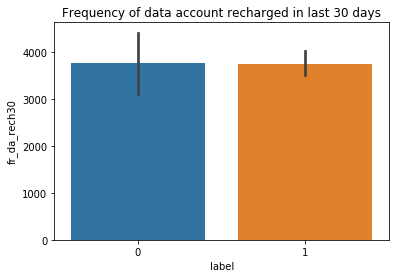

In [79]:
sns.barplot(x=df['label'],y=df['fr_da_rech30'])
plt.title('Frequency of data account recharged in last 30 days')

OBSERVATION:

- with increase in frequency of recharging  data account,higher  chances of defulting.

Text(0.5, 1.0, 'Number of loans taken by user in last 30 days')

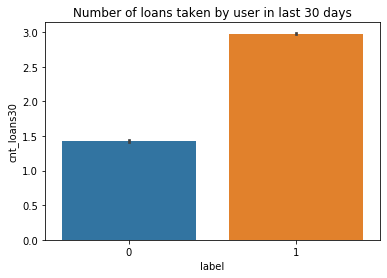

In [80]:
sns.barplot(x=df['label'],y=df['cnt_loans30'])
plt.title('Number of loans taken by user in last 30 days')

OBSERVATION:

- Defaulters has taken between 1 to 1.5 no.of loans.
As practically there will be no 1.5 loan,considering only 1 loan.

- Those who repaid had taken maxof 3 loans.

Text(0.5, 1.0, 'Total amount of loans taken by user in last 30 days')

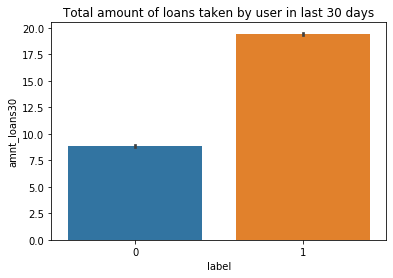

In [81]:
sns.barplot(x=df['label'],y=df['amnt_loans30'])
plt.title('Total amount of loans taken by user in last 30 days')

OBSERVATION:

1)Total Amount of loans took by Defaulters varies between 7.5 and 10.

2)Repayers has took 20 loans which tends to be the max limit.

Text(0.5, 1.0, 'Maximum Amount of loan taken by user in last 30 days')

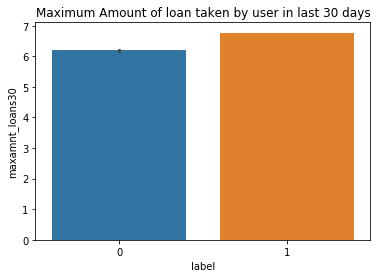

In [82]:
sns.barplot(x=df['label'],y=df['maxamnt_loans30'])
plt.title('Maximum Amount of loan taken by user in last 30 days')


OBSERVATION:

A user can take Maximum  of 7 loans in 30 days.

Defaulters took 6 loans whereas repayers took 7 loans. 

Can say that there not a much difference in loans took by both defaulters and repayers.

Text(0.5, 1.0, 'Median of loan amount took by user in last 30 days')

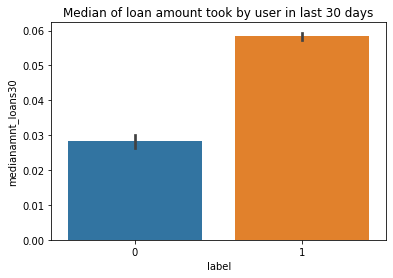

In [83]:

sns.barplot(x=df['label'],y=df['medianamnt_loans30'])
plt.title('Median of loan amount took by user in last 30 days')

OBSERVATION:

- Median of loan Amount by defaulters is 0.03 where as repayers took max of median amount which is 0.06

Text(0.5, 1.0, 'Average payback time in days over last 30 days')

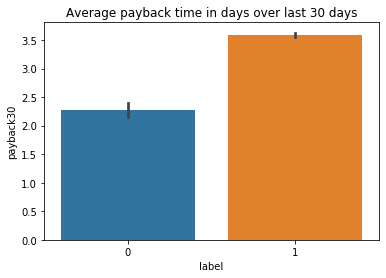

In [84]:
sns.barplot(x=df['label'],y=df['payback30'])
plt.title('Average payback time in days over last 30 days')

OBSERVATION:

- A potentail defaulter might repay in 2 days.

- Repayers took average of 3.5 days.

# 90 DAYS DATA

Text(0.5, 1.0, 'Daily amount spent from main account, averaged over last 90 days ')

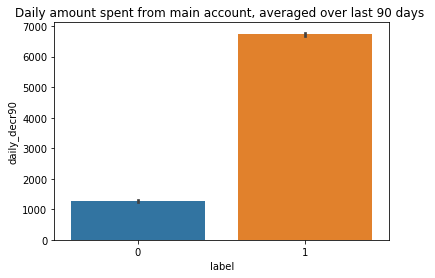

In [85]:
sns.barplot(x=df['label'],y=df['daily_decr90'])
plt.title('Daily amount spent from main account, averaged over last 90 days ')

OBSERVATION: In terms of daily spending from main account in span of 90 days,

- the defaulters has spent a little above 1000

- Repayers has spent 7000 rupaiah.

Text(0.5, 1.0, 'Average main account balance over last 90 days')

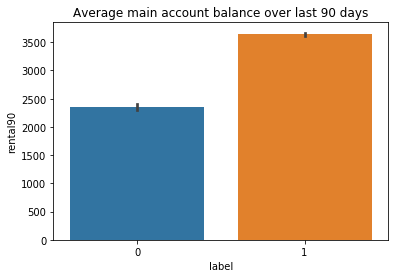

In [87]:
sns.barplot(x=df['label'],y=df['rental90'])
plt.title('Average main account balance over last 90 days')

OBSERVATION: In terms of Average balance over 90 days,

1)Defaullters average=2000 to 2500

2)Repayers average= 3500

Text(0.5, 1.0, 'Number of times main account got recharged in last 90 days')

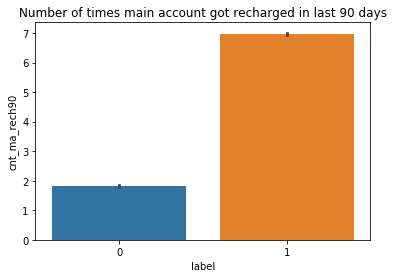

In [88]:

sns.barplot(x=df['label'],y=df['cnt_ma_rech90'])
plt.title('Number of times main account got recharged in last 90 days')


OBSERVATION:

In terms of No.of times Main accounts recharged in 90 days,

defaulters recharged for 2 times.

repayers recharged for 7 times.

Text(0.5, 1.0, 'Frequency of main account recharged in last 90 days')

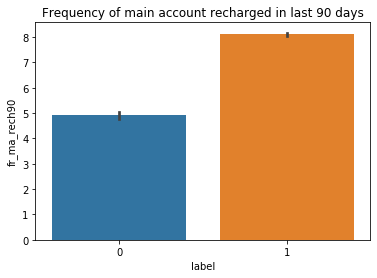

In [89]:
sns.barplot(x=df['label'],y=df['fr_ma_rech90'])
plt.title('Frequency of main account recharged in last 90 days')

OBSERVATION:

In terms of Frequency of Main Account recharge in 90 days period,

defaulters frequency is 5.

repayers frequency is 8.

Text(0.5, 1.0, 'Total amount of recharge in main account over last 90 days')

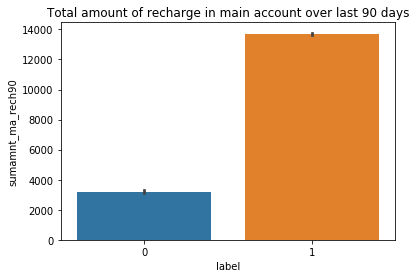

In [91]:
sns.barplot(x=df['label'],y=df['sumamnt_ma_rech90'])
plt.title('Total amount of recharge in main account over last 90 days')

OBSERVATION:

In terms of Total recharge amount in 90 days,

defaulters recharge amount varies from 2000 to 4000.
 Repayers recharged for 14000.

Text(0.5, 1.0, 'Median Amount of recharge done in main account over last 90 days')

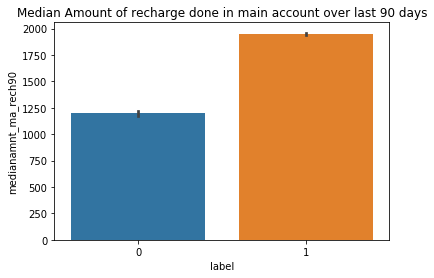

In [92]:
sns.barplot(x=df['label'],y=df['medianamnt_ma_rech90'])
plt.title('Median Amount of recharge done in main account over last 90 days')


OBSERVATION:

In terms of  Recharge amount median,

defaulters median-1250

repayers median -2000

Text(0.5, 1.0, 'Number of times data account got recharged in last 90 days')

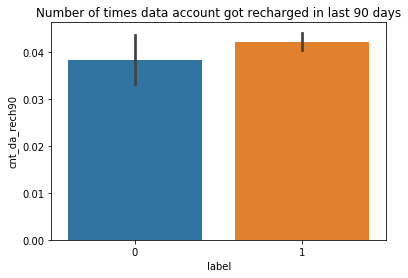

In [93]:
sns.barplot(x=df['label'],y=df['cnt_da_rech90'])
plt.title('Number of times data account got recharged in last 90 days')

OBSERVATION:

In terms of No.of times data account recharged,

both defaulters and repayers has approximately equal no.of recharges.

Text(0.5, 1.0, 'Frequency of data account recharged in last 90 days')

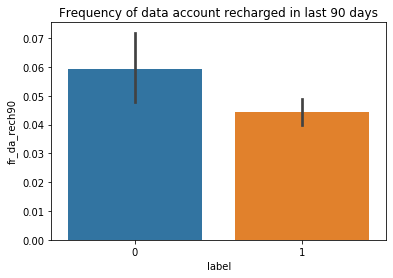

In [94]:
sns.barplot(x=df['label'],y=df['fr_da_rech90'])
plt.title('Frequency of data account recharged in last 90 days')

OBSERVATION:

- With increase in frequency of Data account recharge in 90 days,defaulting rate is high.

Text(0.5, 1.0, 'Number of loans taken by user in last 90 days')

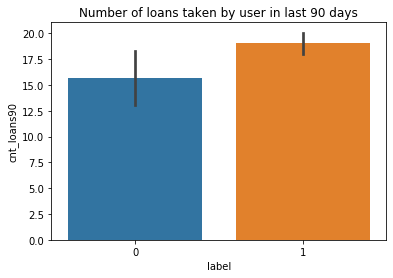

In [95]:

sns.barplot(x=df['label'],y=df['cnt_loans90'])
plt.title('Number of loans taken by user in last 90 days')

OBSERVATION:

1)Defaulters took max of 15 loans

2)Repayers took max of 20 loans.

Text(0.5, 1.0, 'Total amount of loans taken by user in last 90 days')

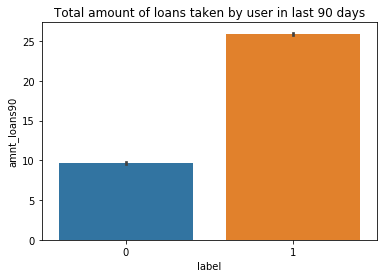

In [96]:
sns.barplot(x=df['label'],y=df['amnt_loans90'])
plt.title('Total amount of loans taken by user in last 90 days')

OBSERVATION:

In total amount of loans users took,

1)defaulters took max of 10 loans.

2)Repayers took 25 max of loans.

Text(0.5, 1.0, 'maximum amount of loan taken by user in 90 days')

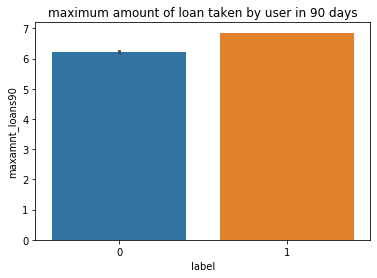

In [97]:
sns.barplot(x=df['label'],y=df['maxamnt_loans90'])
plt.title('maximum amount of loan taken by user in 90 days')

OBSERVATION:

In terms of maximum loan amount,both defaulters and repayers max limit is approximately same.

Text(0.5, 1.0, 'Median of loan amount  took by the user in last 90 days')

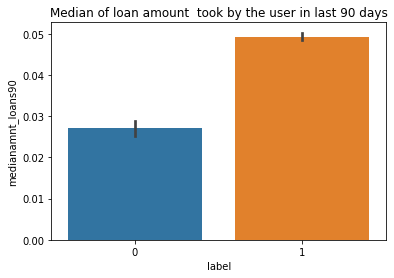

In [99]:
sns.barplot(x=df['label'],y=df['medianamnt_loans90'])
plt.title('Median of loan amount  took by the user in last 90 days')

OBSERVATION:

1)Defaulters took max. median of 0.03 loan amount

2)Repayers took max. median of 0.05 loan amount

Text(0.5, 1.0, 'Average payback time in days over last 90 days')

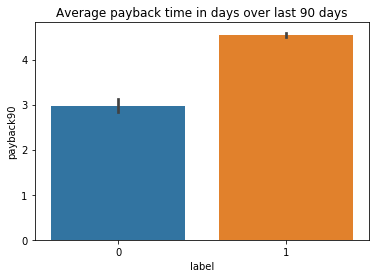

In [100]:
sns.barplot(x=df['label'],y=df['payback90'])
plt.title('Average payback time in days over last 90 days')

OBSERVATION:

Average pay back time of potential defaulter in 90 days is 3 days.

Average pay back time of repayer in 90 days is greater than 4 days.

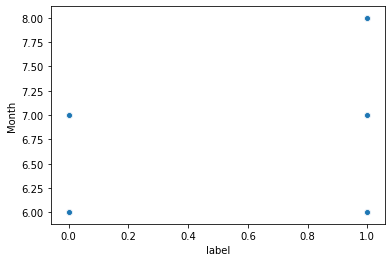

In [101]:
sns.scatterplot(x=df['label'],y=df['Month'])


# CHECKING FOR OUTLIERS:

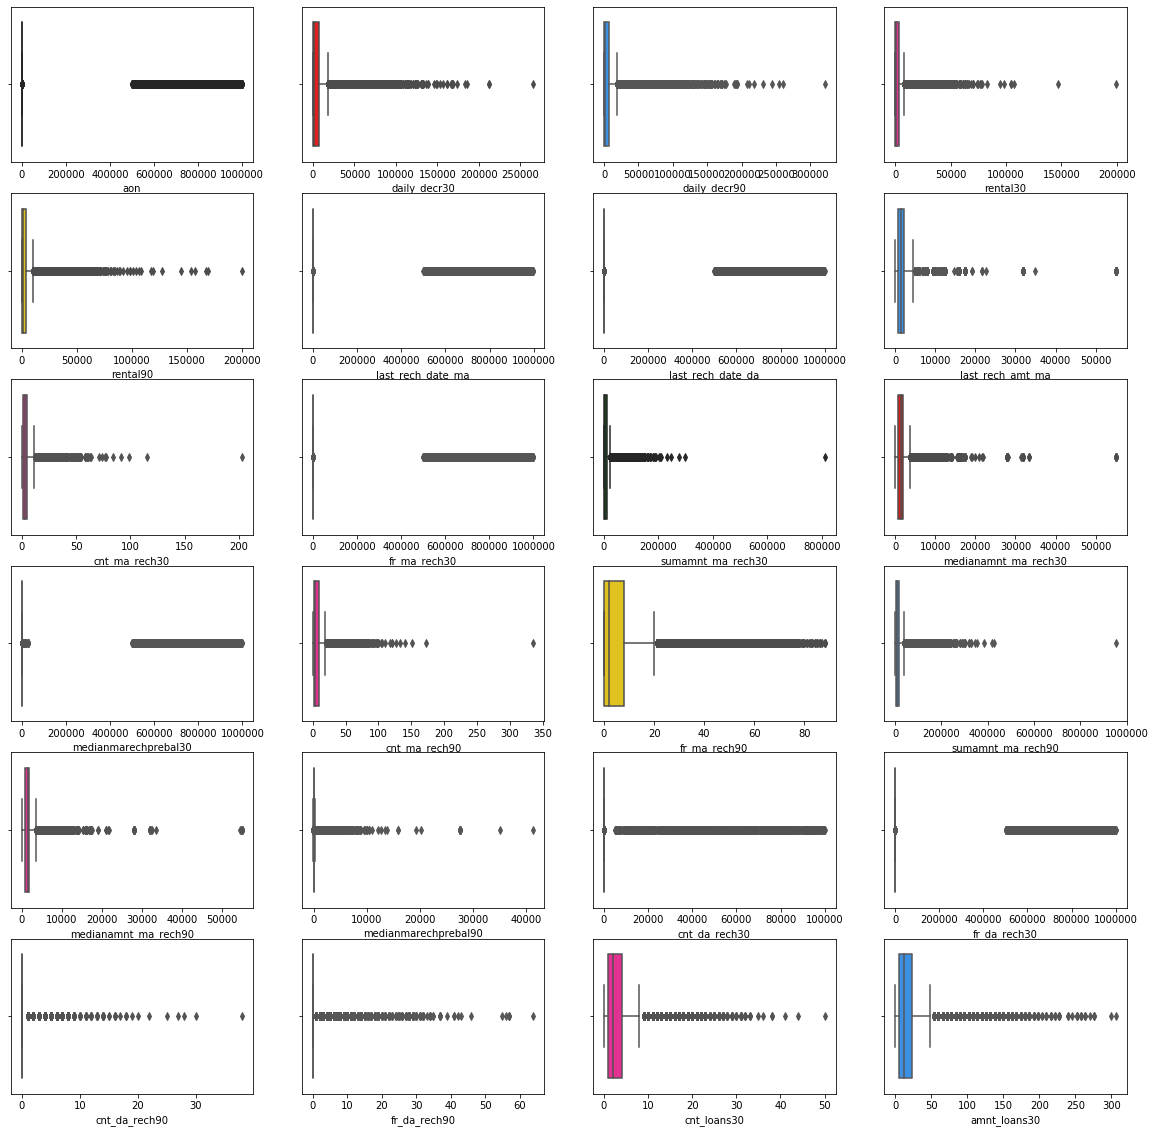

In [102]:
#checking outliers in columns
fig, ((ax1, ax2,ax3,ax4),(ax5,ax6,ax7, ax8),(ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16),(ax17,ax18,ax19,ax20),(ax21,ax22,ax23,ax24)) = plt.subplots(nrows=6, ncols=4, figsize = (20, 20))


sns.boxplot(df['aon'] , color="g",ax=ax1)
sns.boxplot(df['daily_decr30'] , color="r",ax=ax2)
sns.boxplot(df['daily_decr90'] , color="dodgerblue",ax=ax3)
sns.boxplot(df['rental30'] , color="deeppink",ax=ax4)
sns.boxplot(df['rental90'] , color="gold",ax=ax5)
sns.boxplot(df['last_rech_date_ma'] , color="dodgerblue",ax=ax6)
sns.boxplot(df['last_rech_date_da'] , color="deeppink",ax=ax7)
sns.boxplot(df['last_rech_amt_ma'] , color="dodgerblue",ax=ax8)
sns.boxplot(df['cnt_ma_rech30'] , color="deeppink",ax=ax9)
sns.boxplot(df['fr_ma_rech30'] , color="dodgerblue",ax=ax10)
sns.boxplot(df['sumamnt_ma_rech30'] , color="g",ax=ax11)
sns.boxplot(df['medianamnt_ma_rech30'] , color="r",ax=ax12)
sns.boxplot(df['medianmarechprebal30'] , color="dodgerblue",ax=ax13)
sns.boxplot(df['cnt_ma_rech90'] , color="deeppink",ax=ax14)
sns.boxplot(df['fr_ma_rech90'] , color="gold",ax=ax15)
sns.boxplot(df['sumamnt_ma_rech90'] , color="dodgerblue",ax=ax16)
sns.boxplot(df['medianamnt_ma_rech90'] , color="deeppink",ax=ax17)
sns.boxplot(df['medianmarechprebal90'] , color="dodgerblue",ax=ax18)
sns.boxplot(df['cnt_da_rech30'] , color="deeppink",ax=ax19)
sns.boxplot(df['fr_da_rech30'] , color="dodgerblue",ax=ax20)
sns.boxplot(df['cnt_da_rech90'] , color="deeppink",ax=ax21)
sns.boxplot(df['fr_da_rech90'] , color="dodgerblue",ax=ax22)
sns.boxplot(df['cnt_loans30'] , color="deeppink",ax=ax23)
sns.boxplot(df['amnt_loans30'] , color="dodgerblue",ax=ax24)

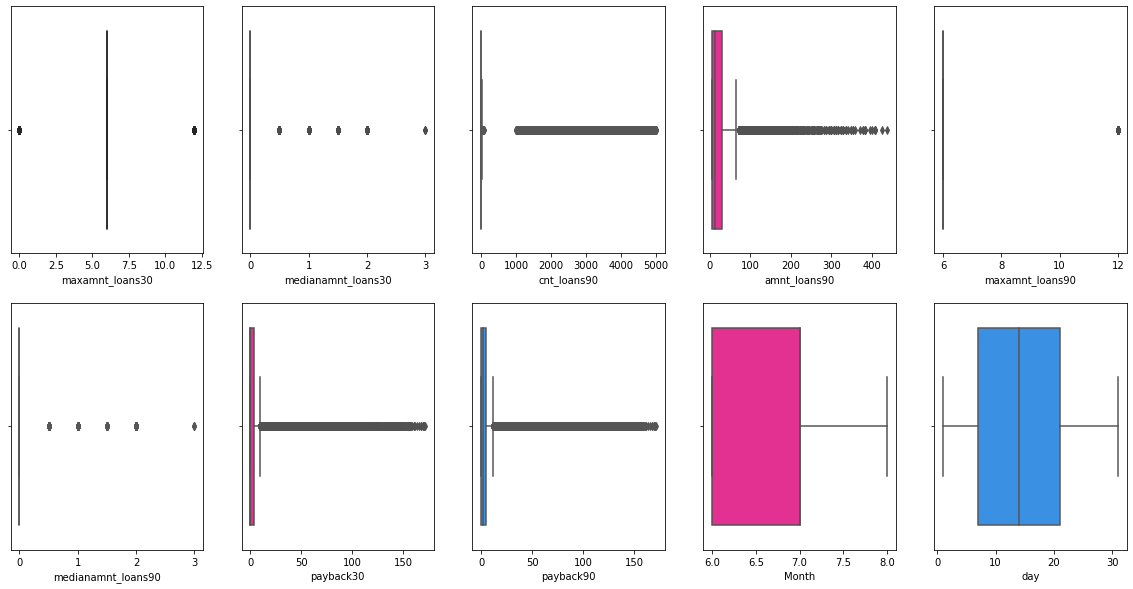

In [105]:
fig, ((ax1, ax2,ax3,ax4,ax5),(ax6,ax7, ax8,ax9,ax10)) = plt.subplots(nrows=2, ncols=5, figsize = (20, 10))


sns.boxplot(df['maxamnt_loans30'] , color="g",ax=ax1)
sns.boxplot(df['medianamnt_loans30'] , color="r",ax=ax2)
sns.boxplot(df['cnt_loans90'] , color="dodgerblue",ax=ax3)
sns.boxplot(df['amnt_loans90'] , color="deeppink",ax=ax4)
sns.boxplot(df['maxamnt_loans90'] , color="gold",ax=ax5)
sns.boxplot(df['medianamnt_loans90'] , color="dodgerblue",ax=ax6)
sns.boxplot(df['payback30'] , color="deeppink",ax=ax7)
sns.boxplot(df['payback90'] , color="dodgerblue",ax=ax8)
sns.boxplot(df['Month'] , color="deeppink",ax=ax9)
sns.boxplot(df['day'] , color="dodgerblue",ax=ax10)

OBSERVATION:

- We can note that except Month and date column, outliers are present in almost every column.

# EDA CONCLUSION

1) We can note that there is less data about defaulters and more about those who did repay their loan. Hence can say that the data is imbalanced.

2) With increase in Age on Network, defaulting rate is higher.

The data is collected based on different parameters for two time periods. One observation is for 30 days and other is for 90 days. Analyzing the parameters separately.

For 30 days:

Average main account balance over last 30 days: There is huge imbalance in the data collected,when compared to the imbalances, we can note that there is less difference between loan default and repayment. Hence can say that with the increase in Average Main balance,there is a probability of defaulting.

No.of times main account got recharged in last 30 days: Defaulters recharged Main account max number between 1 and 2 times.whereas repayers recharged for 4 plus times.

Frequency of main account recharged in last 30 days: With increase in frequency of Recharge in last 30 days, equal probabilities of defaulting and repayment. Even though there is less data about defaulting, there is high chance of defaulting with increased recharge frequency.

Total amount of recharge in main account over last 30 days: The defaulters has max limit ranging between 2000 and 3000 of Total recharge amount.

Median of recharge done in main account over last 30 days: On an average the defaulters has recharged for a max of 1000 indonesian rupaiah.

Median of Main balance before recharge in last 30 days: Defaulters has a Main account recharge median amount ranging between 4000 and 5000. With increase in Median of Main balance recharge, probability of defaulting is very high.

No.of times data account got recharged: Defaulters has recharged the data account for a maximum of 200 to 250 times. With increase in No.of times data accounts recharge, probability of defaulting is high.

Frequency of data account recharged: with increase in frequency of recharging data account, higher chances of defaulting.

Number of loans taken by user: 1) Defaulters has taken between 1 to 1.5 no.of loans. As practically there will be no 1.5 loan, considering only 1 loan. 2) Those who repaid had taken max of 3 loans.

Total amount of loans taken by user: 1)Total Amount of loans took by Defaulters varies between 7.5 and 10
2)Repayers has took 20 loans which tends to be the max limit.

Maximum Amount of loan taken by user: A user can take Maximum of 7 loans in 30 days.Defaulters took 6 loans whereas repayers took 7 loans. Can say that there not a much difference in loans took by both defaulters and repayers.

Median of loan amount took by user: Median of loan Amount by defaulters is 0.03 where as repayers took max of median amount which is 0.06

Average payback time in days over last 30 days: A potentail defaulter might repay in 2 days. Repayers took average of 3.5 days.

BASED ON 90 DAYS:

Daily amount spent from main account: In terms of daily spending from main account in span of 90 days, 1)the defaulters has spent a little abov 1000 2)Repayers has spent 7000 rupaiah.

Average main account balance: In terms of Average balance over 90 days, 1)Defaullters average=2000 to 2500 2)Repayers average= 3500

Number of times main account got recharged: In terms of No.of times Main accounts recharged in 90 days, defaulters recharged for 2 times. Re-payers recharged for 7 times.

Frequency of main account recharge: In terms of Frequency of Main Account recharge in 90 days period, defaulters frequency is 5, Re-payers frequency is 8.

Total amount of recharge in main account: In terms of Total recharge amount in 90 days ,defaulters recharge amount varies from 2000 to 4000. Repayers recharged for 14000. In terms of Recharge amount median,defaulters median-1250,repayers median -2000 In terms of No.of times data account recharged, both defaulters and repayers has approximately equal no.of recharges.

Frequency of data account recharge: With increase in frequency of Data account recharge in 90 days,defaulting rate is high.

Number of loans taken by user: 1)Defaulters took max of 15 loans 2)Repayers took max of 20 loans.

In total amount of loans users took, 1)defaulters took max of 10 loans. 2)Repayers took 25 max of loans.

In terms of maximum loan amount,both defaulters and repayers max limit is approximately same.

Median of loan amount took by the user: 1)Defaulters took max. median of 0.03 loan amount 2)Repayers took max. median of 0.05 loan amount

Average pay back time of potential defaulter in 90 days is 3 days. Average pay back time of repayer in 90 days is greater than 4 days.


In [106]:
for col in df.columns:
        
        print("No.of unique values in ",col,"::",df[col].nunique())

No.of unique values in  label :: 2
No.of unique values in  msisdn :: 184235
No.of unique values in  aon :: 4473
No.of unique values in  daily_decr30 :: 146585
No.of unique values in  daily_decr90 :: 157216
No.of unique values in  rental30 :: 129042
No.of unique values in  rental90 :: 137314
No.of unique values in  last_rech_date_ma :: 1143
No.of unique values in  last_rech_date_da :: 1155
No.of unique values in  last_rech_amt_ma :: 69
No.of unique values in  cnt_ma_rech30 :: 71
No.of unique values in  fr_ma_rech30 :: 1069
No.of unique values in  sumamnt_ma_rech30 :: 15112
No.of unique values in  medianamnt_ma_rech30 :: 509
No.of unique values in  medianmarechprebal30 :: 30205
No.of unique values in  cnt_ma_rech90 :: 110
No.of unique values in  fr_ma_rech90 :: 89
No.of unique values in  sumamnt_ma_rech90 :: 31624
No.of unique values in  medianamnt_ma_rech90 :: 607
No.of unique values in  medianmarechprebal90 :: 29537
No.of unique values in  cnt_da_rech30 :: 1056
No.of unique values in  

# PLOTTING CORRELATIONS

In [107]:
#msisdn is nothing but phone number of the user,it has nothing to do with the predictions of loan payment
#so dropping the msisdn column
df.drop(['msisdn'],axis=1,inplace=True)

In [108]:

df_Cor=df.corr()
df_Cor['label']

label                   1.000000
aon                    -0.003900
daily_decr30            0.168267
daily_decr90            0.166020
rental30                0.057860
rental90                0.075098
last_rech_date_ma       0.003676
last_rech_date_da       0.001772
last_rech_amt_ma        0.131744
cnt_ma_rech30           0.239399
fr_ma_rech30            0.001274
sumamnt_ma_rech30       0.204252
medianamnt_ma_rech30    0.142047
medianmarechprebal30   -0.004820
cnt_ma_rech90           0.237831
fr_ma_rech90            0.084565
sumamnt_ma_rech90       0.206712
medianamnt_ma_rech90    0.120616
medianmarechprebal90    0.040006
cnt_da_rech30           0.003832
fr_da_rech30           -0.000075
cnt_da_rech90           0.003253
fr_da_rech90           -0.005243
cnt_loans30             0.201600
amnt_loans30            0.202318
maxamnt_loans30         0.087468
medianamnt_loans30      0.045556
cnt_loans90             0.004902
amnt_loans90            0.204055
maxamnt_loans90         0.101247
medianamnt

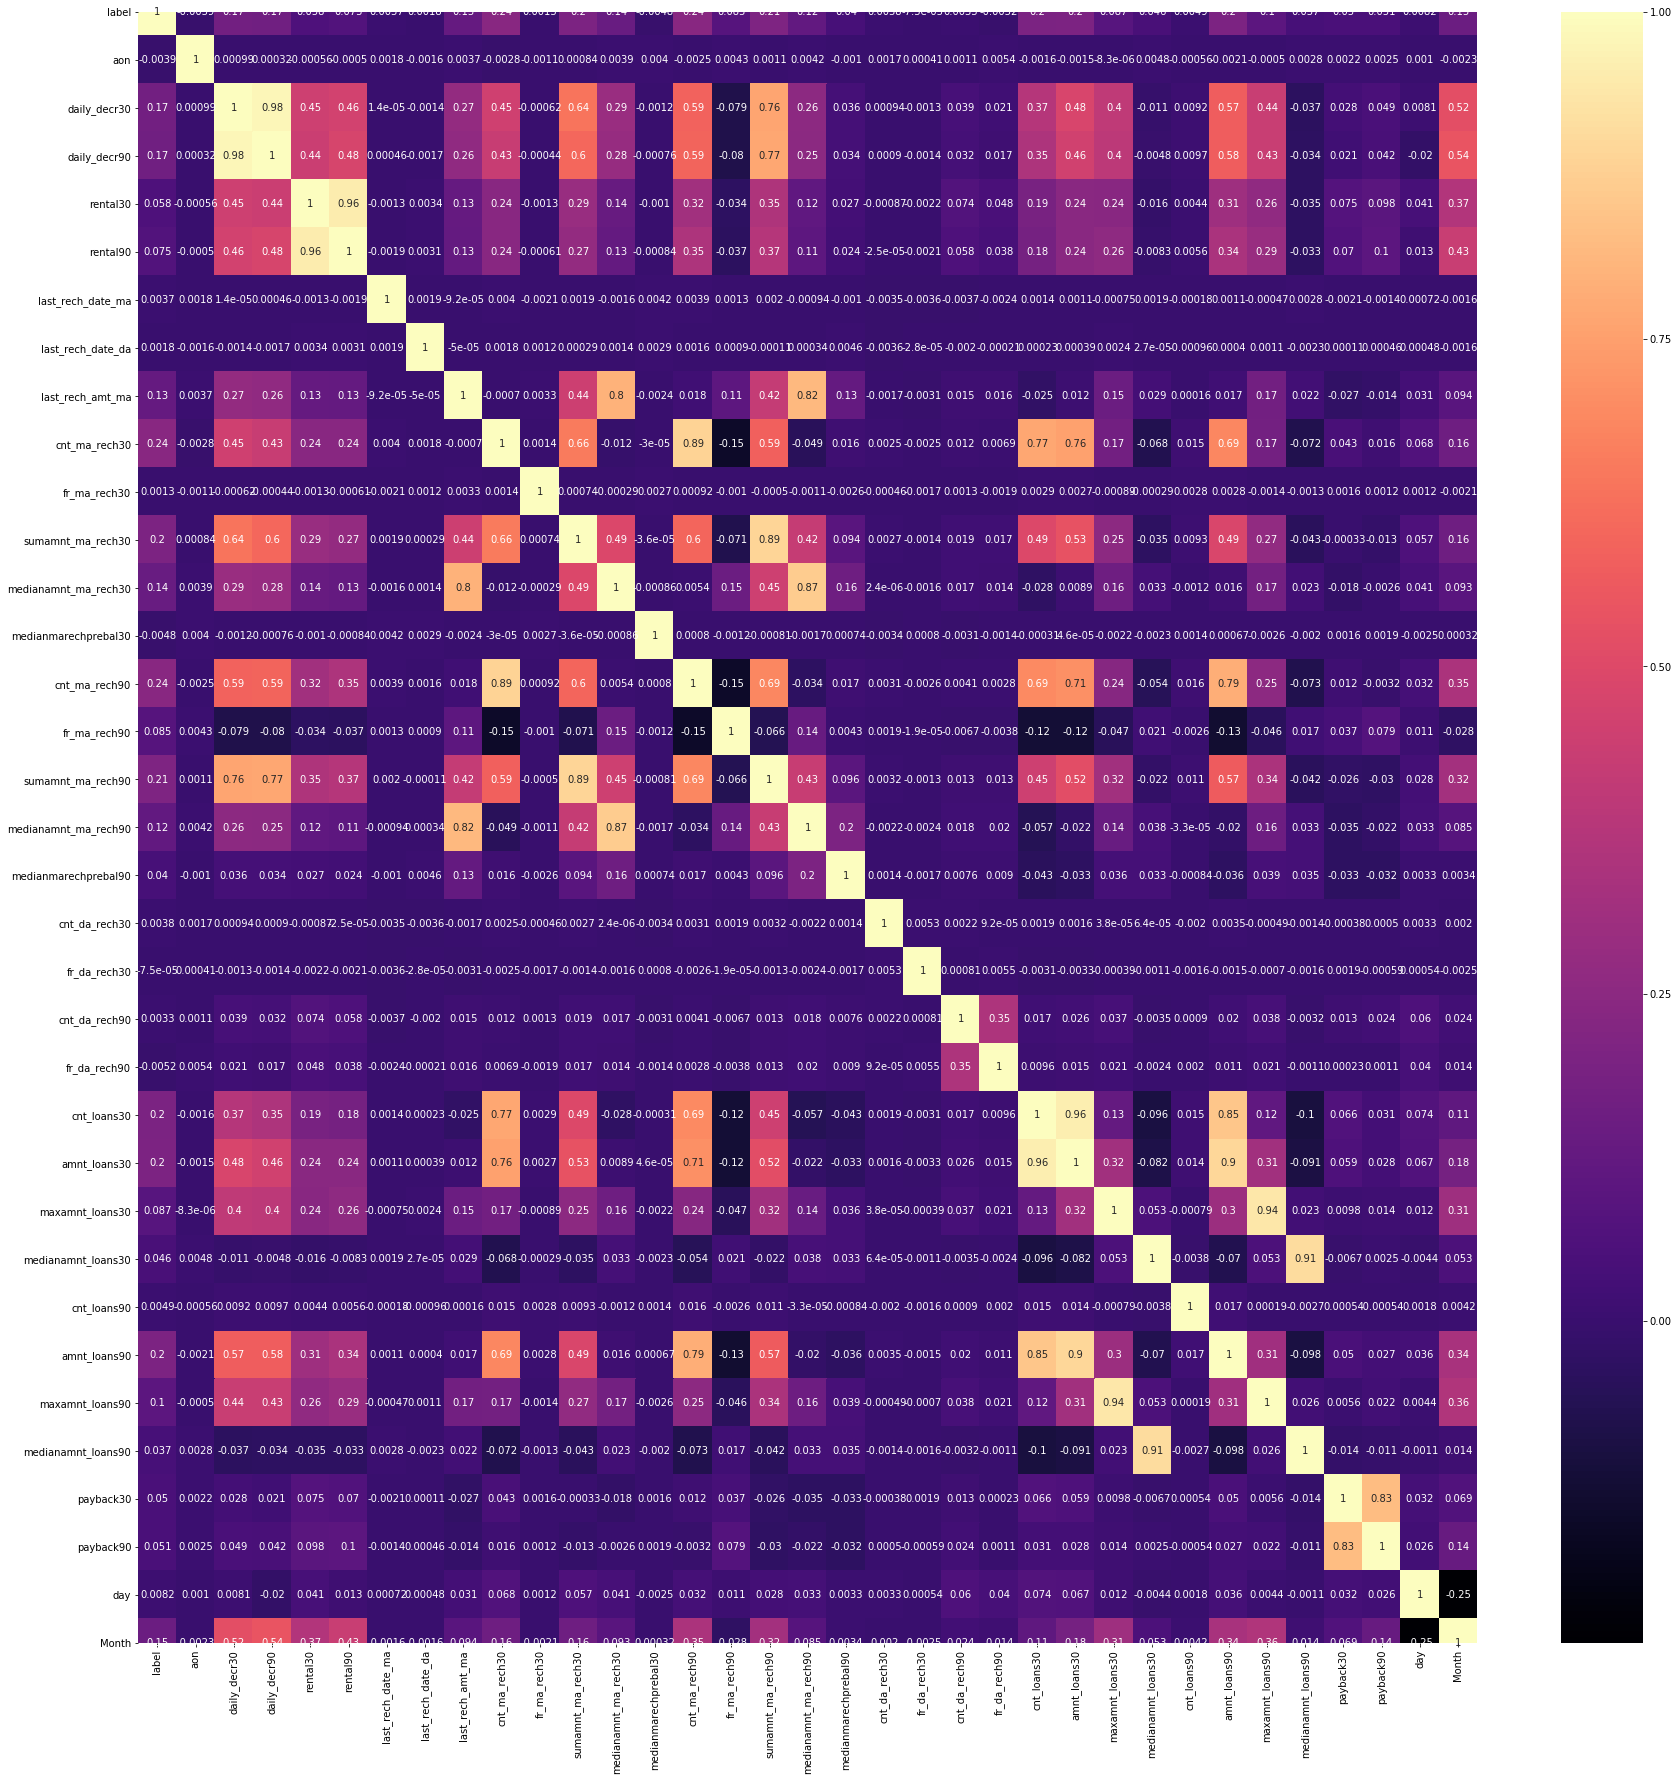

In [109]:
plt.figure(figsize=(30,30))
sns.heatmap(df_Cor,cmap='magma',annot=True)

OUTLIER REMOVAL:

In [111]:
from scipy.stats import zscore

z=np.abs(zscore(df))

print(np.where(z>3))

(array([    21,     22,     22, ..., 207543, 207544, 207544], dtype=int64), array([15, 15, 32, ..., 28, 26, 30], dtype=int64))


In [114]:
df1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df1.shape)

with outliers:: (207550, 35)
After removing outliers:: (160365, 35)


with outliers:: (207550, 35)
After removing outliers:: (160365, 35)
OBSERVATION:

22% of data removed through z score.

# IQR METTHOD:

In [115]:
from scipy import stats 
IQR = stats.iqr(df) 
IQR

117.44

In [116]:

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

In [117]:

df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(31988, 35)


OBSERVATION:

- Huge amounts of data is removed through IQR ,hence can say IQR is not recommended for outlier removal


NOTE:
- As it has been mentioned that data removed from outlier treatment should not exceed 7 to 8%,

- Zscore causes 22% data loss and IQR causes 84.5% data loss.

- Another technique is replacing the outlier data with mean or median.But when we obserfve this data set there is a huge difference between minimum and maximum values.If we calculate mean or median it wont give appropriate values as it includes the outlier value(maximum ones).So not using this approach.

- As we are not dropping the outliers, another approach is capping or winsorization of outliers.

- Using percentile capping. Values that are less than the value at 10th percentile are replaced by 10th percentile value , and values greater than 90th percentile are replaced by 90th percentile value.

In [119]:

cols=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']
for i in cols:
            FloorQ=df[i].quantile(0.10)
            CeilQ=df[i].quantile(0.90)
            df[i] = np.where(df[i] <FloorQ,FloorQ,df[i])
            df[i] = np.where(df[i] >CeilQ,CeilQ,df[i])
            print(i,"->",df[i].skew())

aon -> 0.5284793206435929
daily_decr30 -> 1.0935453721579609
daily_decr90 -> 1.1543224310681035
rental30 -> 1.1265741276622285
rental90 -> 1.1558700165194147
last_rech_date_ma -> 1.1987272241492852
last_rech_date_da -> 0
last_rech_amt_ma -> 0.8359061321231329
cnt_ma_rech30 -> 0.6277453849914029
fr_ma_rech30 -> 1.0070623988221368
sumamnt_ma_rech30 -> 0.7588124242088926
medianamnt_ma_rech30 -> 0.9295986608192282
medianmarechprebal30 -> 1.3584623130969407
cnt_ma_rech90 -> 0.7670588467394291
fr_ma_rech90 -> 1.5893409860791652
sumamnt_ma_rech90 -> 0.8543081510966238
medianamnt_ma_rech90 -> 0.9684104269012621
medianmarechprebal90 -> 1.258477107838736
cnt_da_rech30 -> 0
fr_da_rech30 -> 0
cnt_da_rech90 -> 0
fr_da_rech90 -> 0
cnt_loans30 -> 0.8910588387118499
amnt_loans30 -> 0.7816448336192705
maxamnt_loans30 -> 2.2568424305116785
medianamnt_loans30 -> 0
cnt_loans90 -> 1.017641178749645
amnt_loans90 -> 0.9564054554835316
maxamnt_loans90 -> 2.224470801656892
medianamnt_loans90 -> 0
payback30 -> 

In [120]:
df.describe()

label            aon   daily_decr30   daily_decr90  \
count  207550.000000  207550.000000  207550.000000  207550.000000   
mean        0.873948     637.677639    4224.630321    4664.158439   
std         0.331908     433.902329    5369.966356    6076.149249   
min         0.000000     132.000000       8.674800       8.783167   
25%         1.000000     246.000000      41.760000      41.979500   
50%         1.000000     527.000000    1414.400000    1443.355000   
75%         1.000000     982.000000    7200.000000    7723.997500   
max         1.000000    1410.000000   15564.200000   17720.215000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  207550.000000  207550.000000      207550.000000           207550.0   
mean     2148.837527    2720.963114           5.044625                0.0   
std      2379.411441    3081.028838           4.925487                0.0   
min        66.929000      74.300000           1.000000                0.0   
25%       299.690000     326.340000           1.000000                0.0   
50%      1088.165000    1332.425000           3.000000                0.0   
75%      3334.750000    4167.762500           7.000000                0.0   
max      7277.106000    9422.277000          16.000000                0.0   

       last_rech_amt_ma  cnt_ma_rech30  ...  maxamnt_loans30  \
count     207550.000000  207550.000000  ...    207550.000000   
mean        1660.528861       3.537909  ...         6.754777   
std         1231.349189       2.876785  ...         1.989722   
min            0.000000       0.000000  ...         6.000000   
25%          770.000000       1.000000  ...         6.000000   
50%         1539.000000       3.000000  ...         6.000000   
75%         2309.000000       5.000000  ...         6.000000   
max         4067.000000       9.000000  ...        12.000000   

       medianamnt_loans30    cnt_loans90   amnt_loans90  maxamnt_loans90  \
count            207550.0  207550.000000  207550.000000    207550.000000   
mean                  0.0       3.331279      20.643180         6.769116   
std                   0.0       2.672582      16.275252         2.005785   
min                   0.0       1.000000       6.000000         6.000000   
25%                   0.0       1.000000       6.000000         6.000000   
50%                   0.0       2.000000      12.000000         6.000000   
75%                   0.0       5.000000      30.000000         6.000000   
max                   0.0       9.000000      54.000000        12.000000   

       medianamnt_loans90      payback30      payback90            day  \
count            207550.0  207550.000000  207550.000000  207550.000000   
mean                  0.0       2.199570       2.804969      14.429159   
std                   0.0       2.768133       3.382969       8.421331   
min                   0.0       0.000000       0.000000       1.000000   
25%                   0.0       0.000000       0.000000       7.000000   
50%                   0.0       0.000000       1.714286      14.000000   
75%                   0.0       3.800000       4.500000      21.000000   
max                   0.0       8.000000      10.000000      31.000000   

               Month  
count  207550.000000  
mean        6.787560  
std         0.737225  
min         6.000000  
25%         6.000000  
50%         7.000000  
75%         7.000000  
max         8.000000  

[8 rows x 35 columns]

OBSERVATION:

- We can notice that there is difference in the max values of almost all columns after using the capping technique.

In [123]:
#seggregating data into X and Y
x=df.drop(['label'],axis=1)
y=df['label']

In [124]:

#scaling X values
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(x)

In [125]:

x.shape

(207550, 34)

In [126]:
y.shape

(207550,)

In [127]:
#skewness removal
from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')

C:\Users\GD077686\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


#Imbalanced learn

In [128]:
from imblearn.under_sampling import RandomUnderSampler

UnderSample = RandomUnderSampler(sampling_strategy='majority')
x_us, y_us = UnderSample.fit_resample(x, y)

print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_us.shape)

original  Target dataset shape: (207550,)
Resample Target dataset shape (52324,)


In [129]:
print('original  Independent dataset shape:',x.shape)
print('Resample Independent dataset shape',x_us.shape)

original  Independent dataset shape: (207550, 34)
Resample Independent dataset shape (52324, 34)


In [130]:
from collections import Counter

In [131]:
print(" target distribution before sampling :",Counter(y))

 target distribution before sampling : Counter({1: 181388, 0: 26162})


In [132]:

print(" target distribution after sampling :",Counter(y_us))

 target distribution after sampling : Counter({0: 26162, 1: 26162})



OBSERVATION:

We can note that before performing Random under sampling, the data is unevenly distributed.

there are 181388 records of repayers and 26162 record of defaulters.If we feed this data into the model, 
it may give biased prediction.

So,performed undersampling.After performing undersampling we can note that equal no.of records are fetched for both defauters and repayers.


# MODEL BUILDING:

In [134]:

#Importing necessary libraries

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [135]:
SPLITTING X AND Y:

SyntaxError: invalid syntax (<ipython-input-135-e31505d263d2>, line 1)

In [136]:
x_train,x_test,y_train,y_test=train_test_split(x_us,y_us,test_size=.33,random_state=42)

In [137]:
#USING UNDER SAMPLING::
#LOGISTIC REGRESSION

In [138]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x_us,y_us,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(logreg_score))

cross validation score for svm: 0.7724369987478285


In [139]:
logreg.fit(x_train,y_train)
predicted_logreg=logreg.predict(x_test)
print("Accuracy score::",accuracy_score(y_test,predicted_logreg))
print('Precision: ', precision_score(y_test, predicted_logreg))
print('Recall: ',recall_score(y_test, predicted_logreg))
print('F-measure:',f1_score(y_test, predicted_logreg))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

Accuracy score:: 0.7704870562344356
Precision:  0.7838756677999029
Recall:  0.7473087162866072
F-measure: 0.7651555555555555
Training accuracy:: 0.7731123598710671
Test accuracy:: 0.7704870562344356


# DECISION TREE CLASSIFIER:

In [140]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_us,y_us,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.7761638620653379


In [141]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print("Accuracy score::",accuracy_score(y_test,predicted_dtc))
print('Precision: ', precision_score(y_test, predicted_dtc))
print('Recall: ',recall_score(y_test, predicted_dtc))
print('F-measure:',f1_score(y_test, predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

Accuracy score:: 0.7749464296056061
Precision:  0.7750897094571131
Recall:  0.7750897094571131
F-measure: 0.7750897094571132
Training accuracy:: 0.9986308012665088
Test accuracy:: 0.7749464296056061


# KNeighborsClassifier:

In [142]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_us,y_us,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.7811138427786812


In [143]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print("Accuracy score::",accuracy_score(y_test,predicted_knn))
print('Precision: ', precision_score(y_test, predicted_knn))
print('Recall: ',recall_score(y_test, predicted_knn))
print('F-measure:',f1_score(y_test, predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

Accuracy score:: 0.7816644466323044
Precision:  0.8022346368715084
Recall:  0.7480032411158699
F-measure: 0.7741703606086019
Training accuracy:: 0.8437972444875489
Test accuracy:: 0.7816644466323044


# RandomForestClassifier:

In [145]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_us,y_us,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8387928616722993


In [146]:

rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print("Accuracy score::",accuracy_score(y_test,predicted_rfc))
print('Precision: ', precision_score(y_test, predicted_rfc))
print('Recall: ',recall_score(y_test, predicted_rfc))
print('F-measure:',f1_score(y_test, predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

Accuracy score:: 0.8396942143974054
Precision:  0.8369103638241708
Recall:  0.8440791758305359
F-measure: 0.8404794836330107
Training accuracy:: 0.9986022762928944
Test accuracy:: 0.8396942143974054


# ENSEMBLE TECHNIQUES:
# 1.ADA BOOST CLASSIFIER

In [147]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x_us,y_us,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.8134124164105586


In [148]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print("Accuracy score::",accuracy_score(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

Accuracy score:: 0.8136908553888921
Training accuracy:: 0.8158998202926663
Test accuracy:: 0.8136908553888921


# 2.BAGGING CLASSIFIER

In [149]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x_us,y_us,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))

cross validation score for BAGGING Classifier: 0.8269052592609475


In [150]:

bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print("Accuracy score::",accuracy_score(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

Accuracy score:: 0.8247524179069902
Training accuracy:: 0.9867644122429187
Test accuracy:: 0.8247524179069902


# 3.Gradient Boosting classifier

In [151]:
grbc=BaggingClassifier()
grbc_score=cross_val_score(grbc,x_us,y_us,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(grbc_score))

cross validation score for BAGGING Classifier: 0.827230095150103


In [152]:

grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print("Accuracy score::",accuracy_score(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

Accuracy score:: 0.8259106967046969
Training accuracy:: 0.9864506375331603
Test accuracy:: 0.8259106967046969


OBSERVATION:

- Choosing Adaboost classifier because there both train and test accuracies are same.
- Rest of the two models there is huge difference between train and test accuracies so not considering them.

HYPER PARAMETER TUNING:

In [153]:
parameters={
    'n_estimators':[100,200],
    'learning_rate':[0.001,0.01,0.1,0.2,0.5],
    'algorithm':['SAMME', 'SAMME.R']
}

In [154]:

adb_grid=GridSearchCV(AdaBoostClassifier(),parameters,cv=10,scoring='accuracy')

In [156]:
adb_grid.fit(x_train,y_train)
adb_pred=adb_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,adb_pred))

Accuracy after parameter tuning:: 0.8173394336016679


Accuracy after parameter tuning:: 0.8186135402791452
OBSERVATION:

- We can observe that accuracy score increased after tuning hyper Parameters

In [157]:
from sklearn.metrics import classification_report

In [158]:
print("CLASSIFICATION REORT::\n",classification_report(y_test, adb_pred))

CLASSIFICATION REORT::
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      8628
           1       0.83      0.80      0.81      8639

    accuracy                           0.82     17267
   macro avg       0.82      0.82      0.82     17267
weighted avg       0.82      0.82      0.82     17267



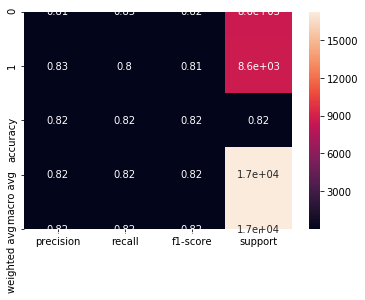

In [159]:
clsf_repo = classification_report(y_test,adb_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [160]:
from sklearn.metrics import roc_auc_score

In [161]:
print("roc auc score::",roc_auc_score(y_test, adb_pred))

roc auc score:: 0.8173485092535961


In [162]:
from sklearn.metrics import roc_curve

In [164]:
fpr1, tpr1, thresh1 = roc_curve(y_test, adb_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, predicted_dtc, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, predicted_rfc, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, predicted_knn, pos_label=1)

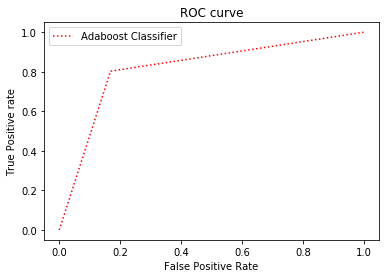

In [165]:

#plotting ROC CURVE

plt.plot(fpr1, tpr1, linestyle=':',color='red', label='Adaboost Classifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# SAVING MODEL:

In [166]:
import joblib

In [167]:
joblib.dump(adb_grid.best_estimator_,'MicroCreditDefaulterPrediction.obj')

['MicroCreditDefaulterPrediction.obj']